# **Getting Started with Matplotlib**


We need  matplotlib.pyplot
 for plotting.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

## About the Data

## Plotting lines

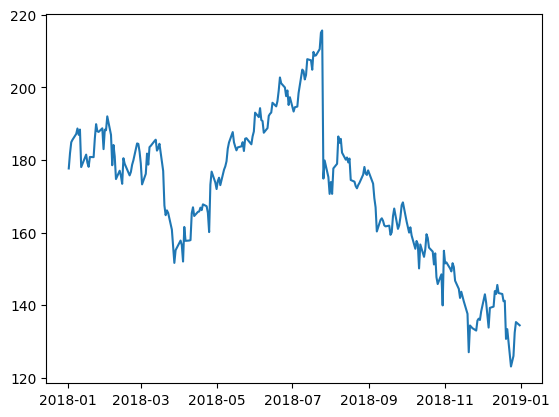

In [ ]:
fb = pd.read_csv(
    'fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)

plt.plot(fb.index, fb.open) # plot x and y values
plt.show() #.show() to show

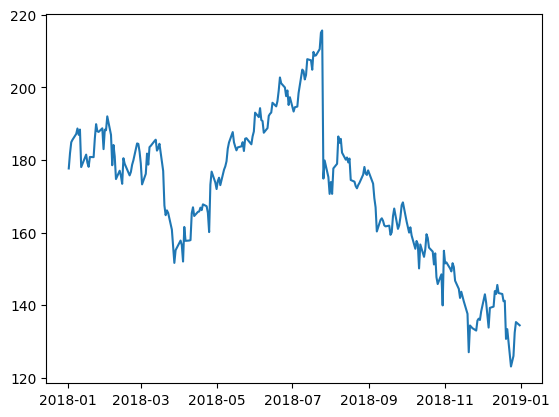

In [ ]:
%matplotlib inline
# this syntax would allow us to not use the .show() function
import matplotlib.pyplot as plt
import pandas as pd

fb = pd.read_csv(
  'fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)
plt.plot(fb.index, fb.open)

## Scatter plots
We can pass in a string specifying the style of the plot. This is of the form '[color][marker][linestyle]'. For example, we can make a black dashed line with 'k--'
 or a red scatter plot with 'ro':

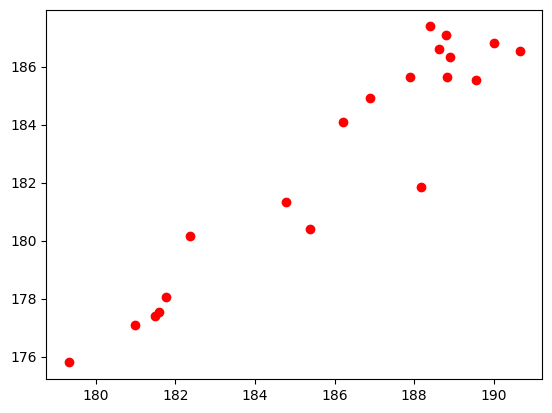

In [ ]:
plt.plot('high', 'low', 'ro', data=fb.head(20)) # plotted using high, low
# ro presents a red scatter plot

## Histograms

(array([6.400e+01, 4.450e+02, 1.137e+03, 1.853e+03, 2.114e+03, 8.070e+02,
        2.800e+02, 9.200e+01, 9.000e+00, 2.000e+00]),
 array([-1.26 , -0.624,  0.012,  0.648,  1.284,  1.92 ,  2.556,  3.192,
         3.828,  4.464,  5.1  ]),
 <BarContainer object of 10 artists>)

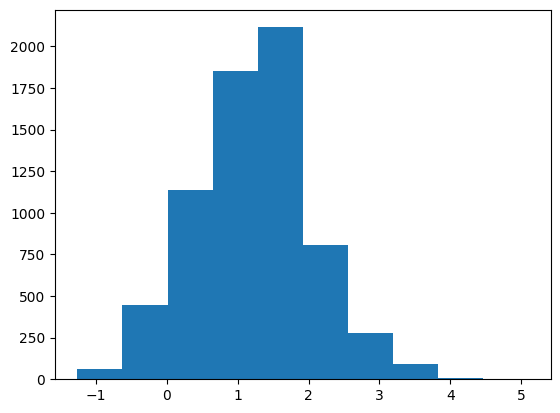

In [ ]:
quakes = pd.read_csv('earthquakes.csv')
plt.hist(quakes.query('magType == "ml"').mag) # histogram gets the magnitude of magType ml

## Bin size matters

 Notice how our assumptions of the distribution of the data can change based on the number of bins (look at the drop between the two highest peaks on the righthand plot):


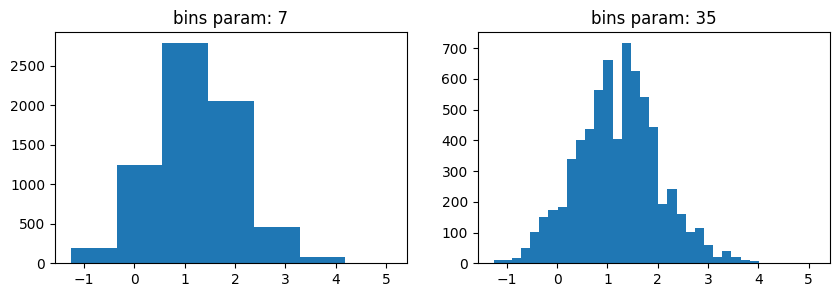

In [ ]:
x = quakes.query('magType == "ml"').mag
fig, axes = plt.subplots(1, 2, figsize=(10, 3)) # subplot 1 row 2 column
for ax, bins in zip(axes, [7, 35]): # binning
  ax.hist(x, bins=bins)
  ax.set_title(f'bins param: {bins}')


## Plot components

In [ ]:
fig = plt.figure() # returns default size

<Figure size 640x480 with 0 Axes>

## Creating subplots

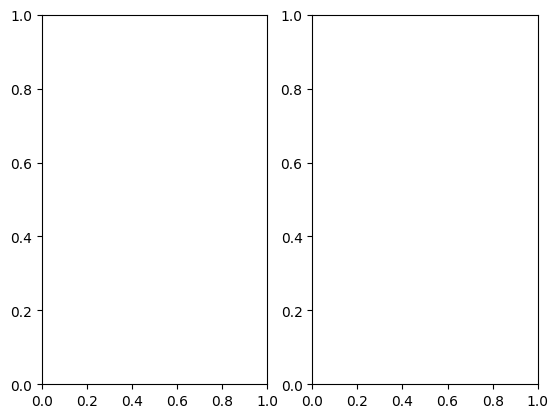

In [ ]:
fig, axes = plt.subplots(1, 2) # 1 row 2 columns

As an alternative to using
plt.subplots()
 we can add the
Axes
 to the
 Figure
 on our own. This allows for some more complex layouts, such as picture in picture:

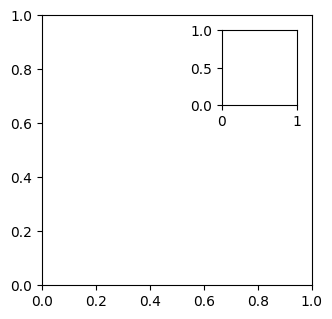

In [ ]:
fig = plt.figure(figsize=(3, 3))
outside = fig.add_axes([0.1, 0.1, 0.9, 0.9])
inside = fig.add_axes([0.7, 0.7, 0.25, 0.25])

##  Creating Plot Layouts with gridspec
We can create subplots with varying sizes as well:

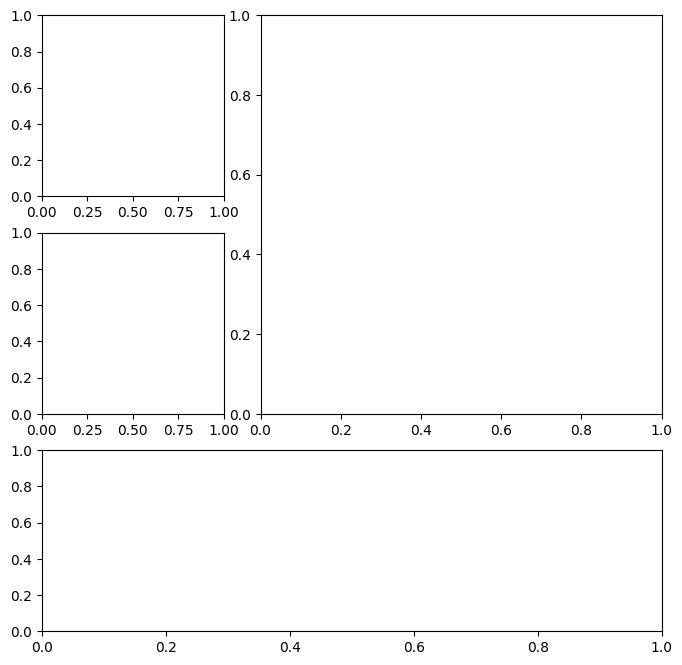

In [ ]:
fig = plt.figure(figsize=(8, 8))
gs = fig.add_gridspec(3, 3) # set grid size
top_left = fig.add_subplot(gs[0, 0]) # coordinates
mid_left = fig.add_subplot(gs[1, 0])
top_right = fig.add_subplot(gs[:2, 1:])
bottom = fig.add_subplot(gs[2,:])

## Saving plots
Use
plt.savefig()
 to save the last created plot. To save a specific
Figure
 object, use its
savefig()
 method.

In [ ]:
fig.savefig('empty.png') # save plot using picture

## Cleaning up
 It's important to close resources when we are done with them. We use
Figure
 to close or say
'all'
 to close all
plt.close()
 to do so. If we pass in nothing, it will close the last plot, but we can pass the specific
 Figure
 objects that are open. Let's close all the
Figure
 objects that are open with
plt.close()
:

In [ ]:
plt.close('all') # good practice to close resources to avoid corruption

## Additional plotting options
Specifying figure size

 Just pass the
figsize
 parameter to
plt.figure()
. It's a tuple of (width, height):

In [ ]:
fig = plt.figure(figsize=(10, 4))

<Figure size 1000x400 with 0 Axes>

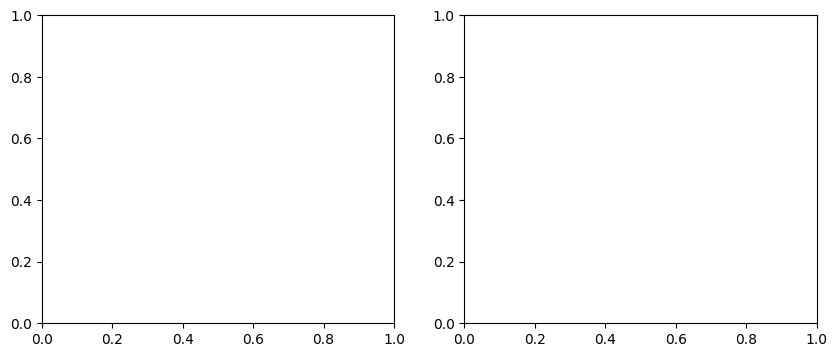

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

## rcParams

In [ ]:
import random
import matplotlib as mpl

rcparams_list = list(mpl.rcParams.keys()) # list of rc params
random.seed(20) # make this repeatable
random.shuffle(rcparams_list)
sorted(rcparams_list[:20])

['animation.convert_args',
 'axes.edgecolor',
 'axes.formatter.use_locale',
 'axes.spines.right',
 'boxplot.meanprops.markersize',
 'boxplot.showfliers',
 'keymap.home',
 'lines.markerfacecolor',
 'lines.scale_dashes',
 'mathtext.rm',
 'patch.force_edgecolor',
 'savefig.facecolor',
 'svg.fonttype',
 'text.hinting_factor',
 'xtick.alignment',
 'xtick.minor.top',
 'xtick.minor.width',
 'ytick.left',
 'ytick.major.left',
 'ytick.minor.width']

 We can check the current default
figsize
 using
 rcParams
:

In [ ]:
mpl.rcParams['figure.figsize'] # gets the default figsize

[6.4, 4.8]

We can also update this value to change the default (until the kernel is restarted):

In [ ]:
mpl.rcParams['figure.figsize'] = (300, 10) # change figsize
mpl.rcParams['figure.figsize']

[300.0, 10.0]

 Use  rcdefaults()
 to restore the defaults

In [ ]:
mpl.rcdefaults() # rcdefaults() restores defaults
mpl.rcParams['figure.figsize']

[6.4, 4.8]

This can also be done via
pyplot
:

In [ ]:
plt.rc('figure', figsize=(20, 20)) # change figsize default to (20, 20)
plt.rcdefaults() # reset the default